In [1]:
#Load the important libraries

import numpy as np
import pandas as pd
import re
import nltk
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_colwidth", 200)
#warnings.filterwarnings("ignore", category = "DeprecationWarning")

%matplotlib inline

In [3]:
#Load the datasets
train = pd.read_csv("train_E6oV3lV.csv")
test = pd.read_csv("test_tweets_anuFYb8.csv")

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


**Things to note**
 - **label** is the column that contains the target variable or the value that has to be predicted. 1 means it's a hate speech and 0 means it is not.
 - **tweet** is the column that contains the text of the tweet. This is the main data on which NLP techniques will be applied.
 
Let's have a close look at some of the tweets.

## Data Inspection

In [5]:
#Let's check out a few non-racist/sexist tweets
train[train['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [6]:
#Let's check out a few racist/sexist tweets
train[train['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


There are quite many words and characters which are not really required. So we will try to keep only those words which are impoprtant and add values. 

In [7]:
train.shape

(31962, 3)

In [8]:
test.shape

(17197, 2)

In [9]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2,242(7%) tweets labelled as racist, and 29,720(93%) tweets labelled as non-racist. So, it is an imbalanced classification challenge.

Now we will check the distribution of the length of the tweets, in terms of words, in both train and test data.

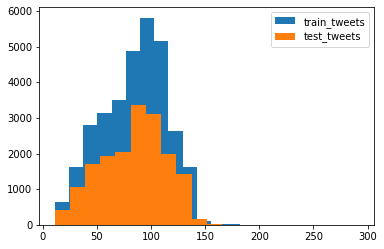

In [10]:
length_train = train['tweet'].str.len()
length_test = test["tweet"].str.len()
plt.hist(length_train, bins = 20, label = "train_tweets")
plt.hist(length_test, bins = 20, label = "test_tweets")
plt.legend()
plt.show()

## Data Cleaning

In [11]:
combine = train.append(test, ignore_index= True)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [12]:
combine.shape

(49159, 3)

In [13]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, ' ', input_txt)
    return input_txt

### 1. Removing twitter handles (@user)

In [15]:
combine['tidy_tweet'] = np.vectorize(remove_pattern) (combine['tweet'], "@[\w]*")

In [16]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### 2. Removing Punctuations, Numbers and Special Characters

In [17]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-z A-Z#)]", " ")

In [18]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


### 3. Removing Short Words

In [19]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ''.join([w for w in x.split() if len(w)>3]))

In [20]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,whenfatherdysfunctionalselfishdragskidsintodysfunction#run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks#lyftcreditcausetheyofferwheelchairvans#disapointed#getthanked
2,3,0.0,bihday your majesty,bihdayyourmajesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#modellovetakewithtime
4,5,0.0,factsguide: society now #motivation,factsguidesociety#motivation


## Text Normalization

In [19]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x: x.split())


In [20]:
tokenized_tweet.head()

0                    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run]
1    [thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                       [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                           [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

Now we can Normalize the tokenized tweets

In [21]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #stemming

In [22]:
tokenized_tweet

0                                                   [when, a, father, is, dysfunct, and, is, so, selfish, he, drag, hi, kid, into, hi, dysfunct, #run]
1                              [thank, for, #lyft, credit, i, can, t, use, caus, they, don, t, offer, wheelchair, van, in, pdx, #disapoint, #getthank]
2                                                                                                                              [bihday, your, majesti]
3                                                                                          [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                                                    [factsguid, societi, now, #motiv]
                                                                             ...                                                                      
49154                                               [thought, factori, left, right, polaris, #

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combine['tidy_tweet'] = tokenized_tweet

In [24]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguid societi now #motiv


# Story Generation and visualization from tweets

**(A) Understanding the common words used in the tweets : Wordcloud**

In [25]:
#Let's visualize all the words our data using the wordcloud plot

all_words = ''.join([text for text in combine["tidy_tweet"]]) 
from wordcloud import WordCloud

In [26]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

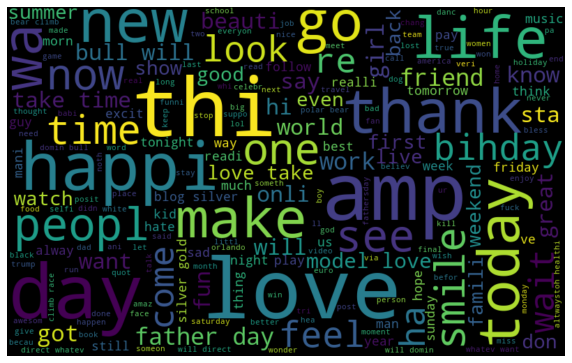

In [27]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

**(B) Common words in non-racist/sexist tweets**

In [28]:
normal_words = ''.join([text for text in combine["tidy_tweet"][combine['label']==0]])

In [29]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(normal_words)

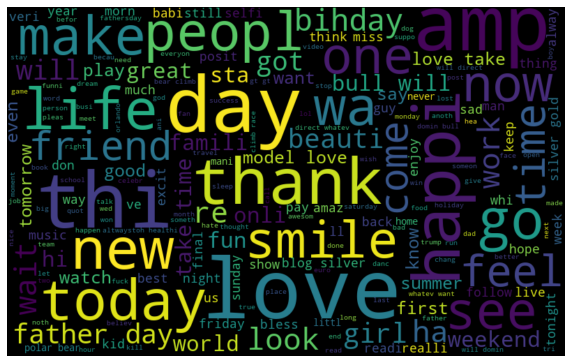

In [30]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

**(C) Common words in Racist tweets**

In [31]:
negative_words = ''.join([text for text in combine["tidy_tweet"][combine['label'] == 1]])

In [32]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(negative_words)

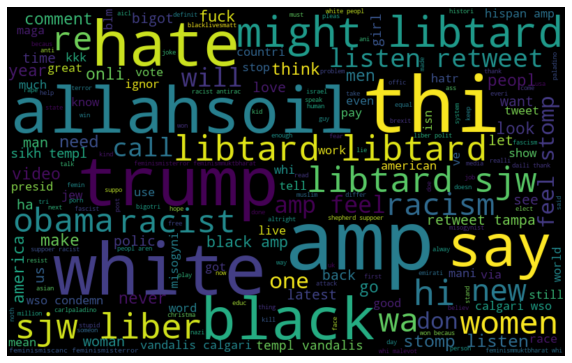

In [33]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on

**D) Understanding the impact of Hashtags on tweets sentiment**

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments. We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [34]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

In [35]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combine['tidy_tweet'][combine['label'] == 1])

In [36]:
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

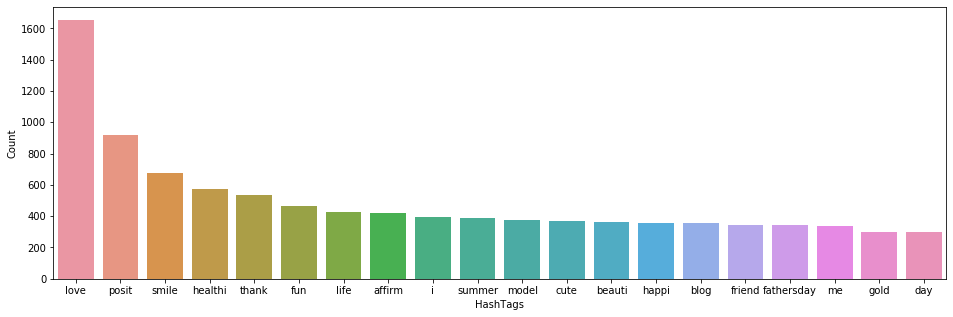

In [37]:
#Non-Racist/Sexist Tweets
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({'HashTags': list(a.keys()), 'Count' : list(a.values())})
# selecting top 20 most frequent hashtags 
d=d.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d , x='HashTags' ,y='Count')
ax.set(ylabel='Count')
plt.show()

All these hashtags are positive and it makes sense.

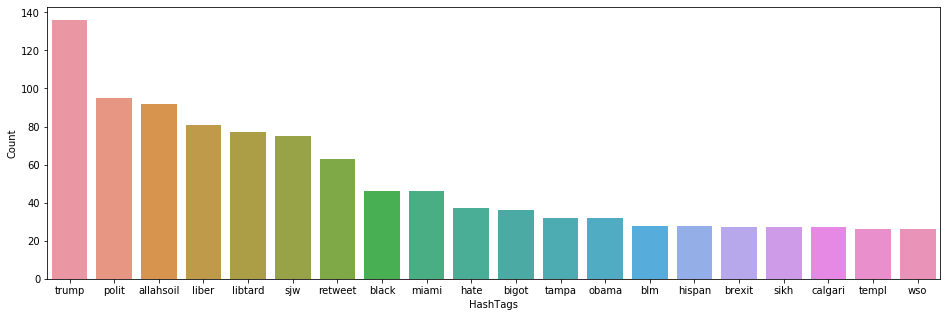

In [38]:
#Racist/Sexist Tweets
b=nltk.FreqDist(HT_negative)
e=pd.DataFrame({'HashTags': list(b.keys()),'Count': list(b.values())})
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x="HashTags",y="Count")
ax.set(ylabel='Count')
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

# Bag-of-Words Features

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet'])

In [40]:
bow.shape

(49159, 1000)

# TF-IDF Features

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df = 2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])

In [42]:
tfidf.shape

(49159, 1000)

# Word2Vec Features

### 1. Word Embeddings

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high-dimensional word features into low dimensional feature vectors by preserving the similarity in the corpus.

In [43]:
import gensim
tokenized_tweets = []
for i in range (len(combine)):
    tokenized_tweets.append([w for w in combine['tidy_tweet'][i].split()])
model_w2v = gensim.models.Word2Vec(tokenized_tweets, 
                                  size = 200, #desired no. of features/ independent variables
                                  window = 5, #context window size
                                  min_count = 5,
                                  sg = 1, #for skip-gram model
                                  hs = 0,
                                  negative = 10, #no. of negative sampling
                                  workers = 4, #no. of cores
                                  seed = 34)
model_w2v.train(tokenized_tweets, total_examples = len(combine['tidy_tweet']), epochs=20)

(8932096, 12232260)

In [44]:
model_w2v.wv.most_similar(positive = "dinner")

[('#foodblogg', 0.5151581168174744),
 ('burrito', 0.5111470222473145),
 ('spici', 0.5092965960502625),
 ('#avocado', 0.5010029077529907),
 ('dess', 0.4962347149848938),
 ('breakfast', 0.4938579797744751),
 ('avocado', 0.49298983812332153),
 ('#steak', 0.4806210994720459),
 ('#saturd', 0.4765305519104004),
 ('picnic', 0.47326549887657166)]

In [45]:
model_w2v.wv.most_similar(positive = "love")

[('#melanin', 0.45266100764274597),
 ('#papa', 0.4412619471549988),
 ('#touch', 0.440388560295105),
 ('goodluck', 0.43376022577285767),
 ('wid', 0.42971816658973694),
 ('judi', 0.42602694034576416),
 ('#step', 0.42357906699180603),
 ('gorgeou', 0.42210549116134644),
 ('sayin', 0.4211961030960083),
 ('josh', 0.4168199896812439)]

In [46]:
model_w2v.wv.most_similar(positive = "trump")

[('donald', 0.5195058584213257),
 ('unfit', 0.5170566439628601),
 ('potu', 0.5028553605079651),
 ('#deplor', 0.49493008852005005),
 ('#conman', 0.4859054684638977),
 ('carl', 0.4770069122314453),
 ('colombia', 0.45907121896743774),
 ('churchil', 0.45829057693481445),
 ('#paladino', 0.4577939212322235),
 ('#clinton', 0.45521706342697144)]

In [47]:
model_w2v['food']

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-4.62613225e-01,  1.84865832e-01, -9.28809121e-02, -5.77323616e-01,
        6.46904588e-01, -7.58258522e-01,  4.83680606e-01,  3.64281051e-02,
        4.86085325e-01, -1.64255500e-01,  2.39641309e-01, -6.77712336e-02,
       -7.52740353e-02,  7.68465877e-01, -3.86706024e-01, -2.11725861e-01,
        2.84118652e-01,  1.58943325e-01, -3.05819392e-01, -8.04917961e-02,
       -1.29418433e-01,  8.79855603e-02, -3.75012964e-01,  1.01366095e-01,
       -1.29671499e-01,  1.04328066e-01, -3.28995347e-01,  2.41854861e-02,
       -2.48606622e-01,  4.94449995e-02, -2.19253108e-01,  3.63650084e-01,
        2.78963447e-01, -5.39276183e-01,  1.81765109e-02,  4.35908772e-02,
        2.25810751e-01, -1.05157959e+00, -7.09288428e-03, -1.27608813e-02,
       -4.52174544e-01,  2.83789188e-01,  1.98219702e-01,  6.20823741e-01,
       -2.63747096e-01, -4.12942618e-02, -2.78360456e-01,  1.48859262e-01,
       -3.92993316e-02, -2.95656472e-01, -1.04503319e-01, -7.93709084e-02,
       -8.19503069e-01, -

In [48]:
len(model_w2v['food'])

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

### Preparing vectors for tweets

In [49]:

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [50]:
#Preparing word2vec feature set…
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape    
#Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49159, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

### 2. Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors foe sentence/paragraphs/documents.This approach is ana extension of word2vec.

In [51]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


To implement doc2vec, we have to labelise or tag each tokenized tweet with unique IDs. We can do so by using Genism's LabeledSentence() function.

In [53]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) #label all tweets

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [54]:
#Let's have a look at the result.
labeled_tweets[:6]

[LabeledSentence(words='when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run', tags=['tweet_0']),
 LabeledSentence(words='thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getthank', tags=['tweet_1']),
 LabeledSentence(words='bihday your majesti', tags=['tweet_2']),
 LabeledSentence(words='#model i love u take with u all the time in ur', tags=['tweet_3']),
 LabeledSentence(words='factsguid societi now #motiv', tags=['tweet_4']),
 LabeledSentence(words='huge fan fare and big talk befor they leav chao and pay disput when they get there #allshowandnogo', tags=['tweet_5'])]

In [57]:
[LabeledSentence(words=['when', 'a','father', 'is','dysfunct', 'and', 'is', 'so','selfish', 'he','drag', 'hi','kid', 'into','hi', 'dysfunct', '#run'], tags=['tweet_0']),
LabeledSentence(words=['thank','for', '#lyft', 'credit','i', 'can t', 'use', 'caus', 'they', 'don t', 'offer', 'wheelchair', 'van', 'in', 'pdx','#disapoint', '#getthank'], tags=['tweet_1']),
LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'ur'], tags=['tweet_3']),
LabeledSentence(words=['factsguid', 'societi', 'now', '#motiv'], tags=['tweet_4']),
LabeledSentence(words=['huge', 'fan', 'fare', 'and', 'big', 'talk', 'befor', 'they', 'leav', 'chao', 'and', 'pay', 'disput', 'when', 'they', 'get', 'there', '#allshowandnogo'], tags=['tweet_5'])]

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """Entry point for launching an IPython kernel.
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages

[LabeledSentence(words=['when', 'a', 'father', 'is', 'dysfunct', 'and', 'is', 'so', 'selfish', 'he', 'drag', 'hi', 'kid', 'into', 'hi', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', 'for', '#lyft', 'credit', 'i', 'can t', 'use', 'caus', 'they', 'don t', 'offer', 'wheelchair', 'van', 'in', 'pdx', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'ur'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', 'now', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fan', 'fare', 'and', 'big', 'talk', 'befor', 'they', 'leav', 'chao', 'and', 'pay', 'disput', 'when', 'they', 'get', 'there', '#allshowandnogo'], tags=['tweet_5'])]

#### Now let's train a doc2vec model

In [66]:
model_d2v = gensim.models.Doc2Vec(dm = 1,
                                 dm_mean = 1,
                                 size = 200,
                                 window = 5,
                                 negative = 7,
                                 min_count = 5,
                                 workers = 3,
                                 alpha = 0.1,
                                 seed = 23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combine['tidy_tweet']), epochs = 20)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 728877.53it/s]


#### Prepaing doc2vec feature set

In [68]:
doc2vec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combine)):
    doc2vec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(doc2vec_arrays)

In [69]:
docvec_df.shape

(49159, 200)

# Modeling

## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [80]:
#Bag-of-Words Features
# Extracting train and test BoW features 
train_bow = bow[:train.shape[0],:] 
test_bow = bow[train.shape[0]:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=2,test_size=0.3) 
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set 0.531
#Now let’s make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5684039087947883
